# Imports

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import qutip as qt
from scipy.signal import chirp
from scipy.constants import hbar
from scipy.constants import k as kB
import cent as ce
from tqdm import tqdm

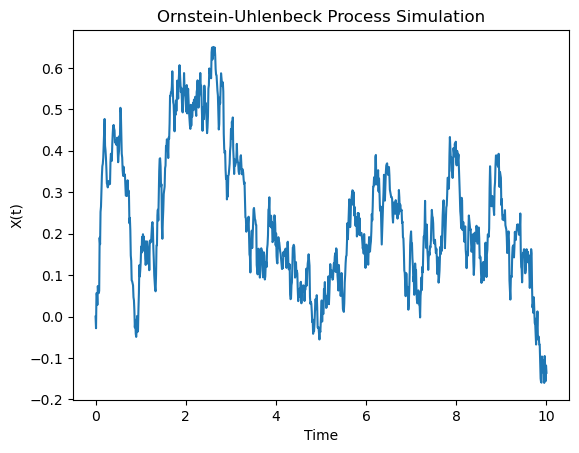

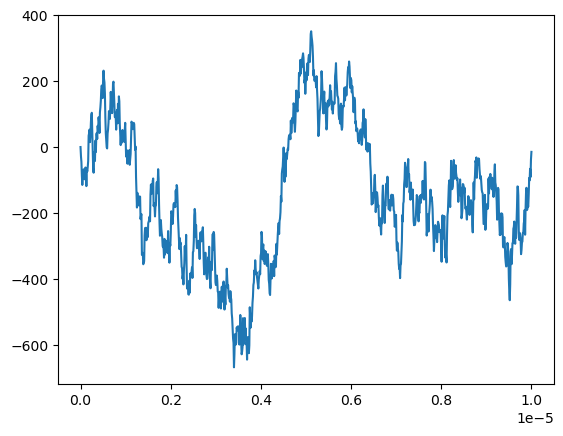

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the OU process
theta = 0.7      # Speed of mean reversion
mu = 0.0         # Long-term mean
sigma = 0.3      # Volatility
X0 = 0         # Initial value
T = 10.0         # Total time
dt = 0.01        # Time step
N = int(T / dt)  # Number of time steps

# Pre-allocate array for efficiency
X = np.zeros(N)
X[0] = X0

# Generate the OU process
for t in range(1, N):
    dW = np.sqrt(dt) * np.random.normal(0, 1)
    X[t] = X[t-1] + theta * (mu - X[t-1]) * dt + sigma * dW

# Plot the result
plt.plot(np.linspace(0, T, N), X)
plt.title("Ornstein-Uhlenbeck Process Simulation")
plt.xlabel("Time")
plt.ylabel("X(t)")
plt.show()

def ou_process(tlist, t2_star, tau_c, X0):
    theta = 1/tau_c
    dt = tlist[1] - tlist[0]
    mu = 0
    sigma = np.sqrt(2/t2_star/tau_c)
    N = len(tlist)
    X = np.zeros(N)
    X[0] = X0
    for t in range(1, N):
        dW = np.sqrt(dt) * np.random.normal(0, 1)
        X[t] = X[t-1] + theta * (mu - X[t-1]) * dt + sigma * dW
    return X

tlist = np.linspace(0, 10e-6, 1000)
t2_star = 1.6e-6
X = ou_process(tlist, t2_star, 10e-6, X0)
plt.plot(tlist, X)
plt.show()

N: 307200
dt: 1.6276041666666668e-10
[0.00000e+00 2.00000e+04 4.00000e+04 ... 3.07196e+09 3.07198e+09
 3.07200e+09]


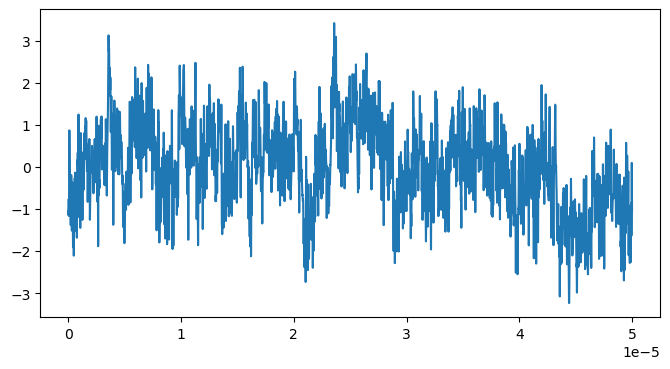

In [3]:
def generate_1f_noise(tlist, f_min, f_max, seed=None): 
    """
    Generate a real-valued 1/f (1/omega) noise trace whose variance is 1.

    Parameters
    ----------
    tlist : array_like, shape (N,)
        Monotonic time samples (assumed uniformly spaced).
    omega_min : float
        Low-frequency cutoff (rad/s), e.g. 2*pi/T_meas.
    omega_max : float
        High-frequency cutoff (rad/s), e.g. physical roll‑off.
    seed : int or None
        RNG seed for reproducibility.

    Returns
    -------
    noise : ndarray, shape (N,)
        Real 1/f noise time series evaluated at tlist.
    """
    if seed is not None:
        np.random.seed(seed)


    N  = len(tlist)
    dt = tlist[1] - tlist[0]
    print(f'N: {N}')
    print(f'dt: {dt}')

    # Positive frequencies in Hz
    freqs = np.fft.rfftfreq(N, d=dt)
    df    = freqs[1] - freqs[0]
    print(freqs)
    # Enforce bounds, skip DC
    f_min = max(f_min, freqs[0])
    f_max = min(f_max, freqs[-1])
    valid = (freqs >= f_min) & (freqs <= f_max)
    if not np.any(valid):
        raise ValueError(f'No valid frequencies between {f_min} and {f_max}')

    # 1/f spectrum in Hz
    S = np.zeros_like(freqs)
    S[valid] = 1.0 / freqs[valid]

    # Now variance = 2*∑ S·df → normalization:
    norm = np.sqrt(1.0/(2.0 * np.sum(S * df)))
    amps = norm * np.sqrt(S)

    # Random phases & inverse FFT
    phases = np.exp(1j*2*np.pi*np.random.rand(len(freqs)))
    Xk     = amps * phases
    signal = np.fft.irfft(Xk, n=N)
    return signal/np.std(signal)

# omega_max_list = np.linspace(1e6, 30e6, 10)
# variance_list = []
# for omega_max in omega_max_list:
#     tlist = np.arange(0, 50e-6, 1/6.144e9)
#     noise = generate_1f_noise(tlist,f_min=1, f_max=omega_max)
#     # plt.figure(figsize=(8,4))
#     # plt.plot(tlist, noise)
#     # plt.show()
#     # print(f'std: {np.std(noise)/1e6} MHz')
#     # print(f'var: {np.var(noise)/1e12} MHz^2')
#     # print(f'mean: {np.mean(noise)/1e6} MHz')
#     # print(f'max: {np.max(noise)/1e6} MHz')
#     # print(f'min: {np.min(noise)/1e6} MHz')
#     # print(np.var(noise))
#     variance_list.append(np.var(noise))

# plt.figure(figsize=(8,4))
# plt.plot(omega_max_list, variance_list)
# plt.show()


tlist = np.arange(0, 50e-6, 1/6.144e9)
noise = generate_1f_noise(tlist,f_min=1, f_max=20e6)
plt.figure(figsize=(8,4))
plt.plot(tlist, noise)
plt.show()

# TPE Sampler

# Qubit Digital Twin Tester

## PLE Testing

In [5]:
qargs = {
    'optical_fc':           2e9, 
    'optical_df':           0.3e9,
    'mw_fc':                1.3e9, 
    'optical_lifetime':     1/6e-9, 
    'branching_ratio':      0.0005,
    'dark_count_rate':      10e3,
    'coupling_efficiency':  0.002,
    'debye_waller_factor':  0.7,
    'non_radiative_factor': 0.5,
    't2_star' :             1.6e-6
    }
q = ce.ColorCenterQubit(**qargs)

/home/floresh2/.conda/envs/zm/lib/python3.12/site-packages/qutip/solver/options.py:16: FutureWarning: Dedicated options class are no longer needed, options should be passed as dict to solvers.
  warnings.warn(


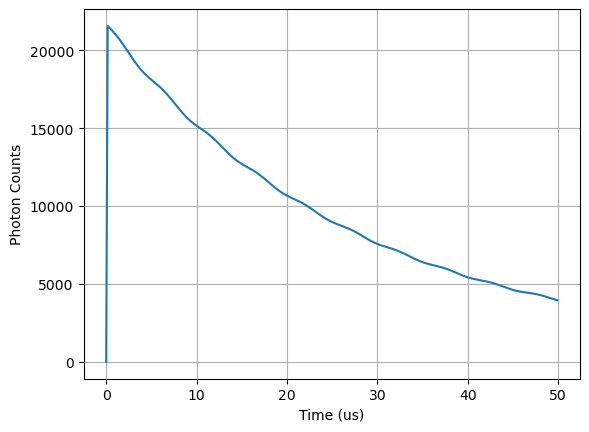

In [6]:
qargs = {
    'optical_fc':           2e9, 
    'optical_df':           0.3e9,
    'mw_fc':                1.3e9, 
    'optical_lifetime':     1/6e-9, 
    'branching_ratio':      0.0005,
    'dark_count_rate':      10e3,
    'coupling_efficiency':  0.002,
    'debye_waller_factor':  0.7,
    'non_radiative_factor': 0.5,
    't2_star' :             1.6e-6
    }
q = ce.ColorCenterQubit(**qargs)
q.initialize_readout(3e8, length=150e-6, bin_dt=164.0625e-9, bin_res=10, plot=True)

zpl_counts, psb_counts = q.auto_readout('f0', 50e-6, use_dark_counts=False, plot=True, reps=1e5, cps=True)

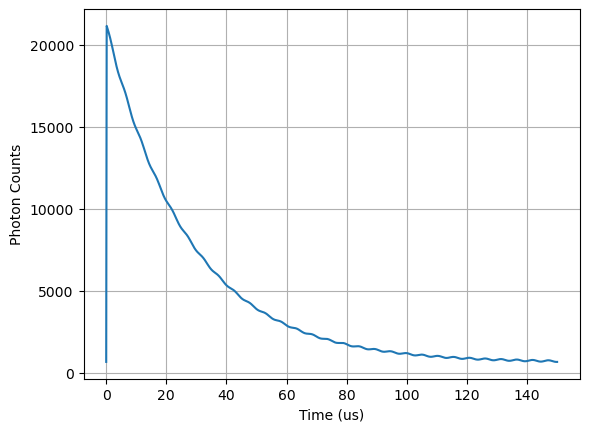

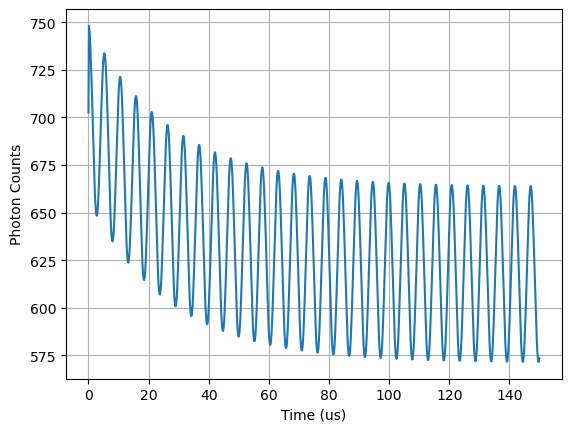

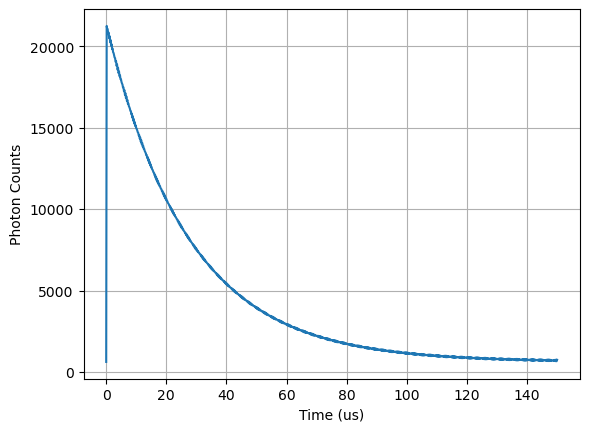

In [8]:

zpl_counts, psb_counts = q.auto_readout('f0', 150e-6, use_dark_counts=False, plot=True, reps=1e5, cps=True)
zpl_counts, psb_counts = q.auto_readout('f0', 150e-6, use_dark_counts=False, plot=True, reps=1e5, cps=True)
zpl_counts, psb_counts = q.auto_readout('f1', 150e-6, use_dark_counts=False, plot=True, reps=1e5, cps=True)

10.1%. Run time:   2.98s. Est. time left: 00:00:00:26
20.1%. Run time:   5.92s. Est. time left: 00:00:00:23
30.2%. Run time:   9.00s. Est. time left: 00:00:00:20
40.0%. Run time:  12.43s. Est. time left: 00:00:00:18
50.1%. Run time:  16.12s. Est. time left: 00:00:00:16
60.2%. Run time:  20.08s. Est. time left: 00:00:00:13
70.0%. Run time:  24.05s. Est. time left: 00:00:00:10
80.1%. Run time:  28.10s. Est. time left: 00:00:00:06
90.1%. Run time:  32.14s. Est. time left: 00:00:00:03
100.0%. Run time:  36.30s. Est. time left: 00:00:00:00
Total run time:  36.30s


/home/floresh2/.conda/envs/zm/lib/python3.12/site-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/floresh2/.conda/envs/zm/lib/python3.12/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


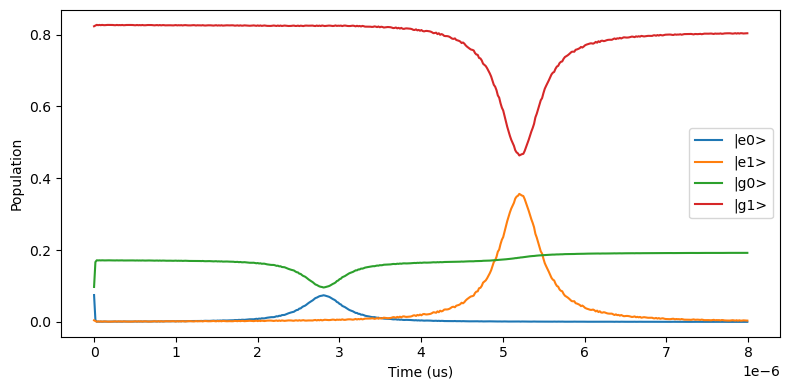

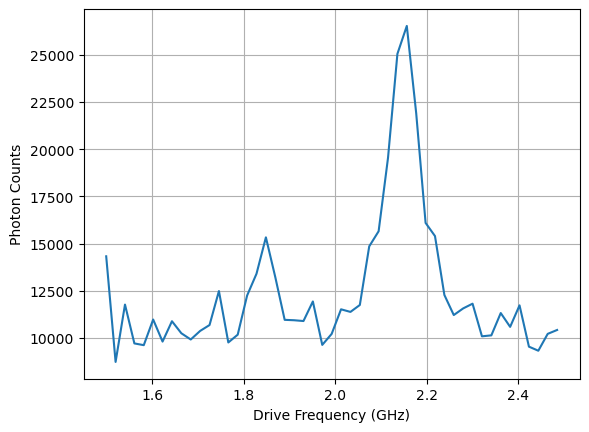

In [27]:
tbins, f_drive, zpl_counts, psb_counts = q.frequency_sweep(fcen=2e9, fwidth=1e9, amps=3e8, pulse_length=8e-6, reps=1e5, bin_dt=164.0625e-9, bin_res=10, use_dark_counts=True, plot=True, cps=True)

## CPMG Testing

In [50]:
qargs = {
    'optical_fc':           2e9, 
    'optical_df':           0.3e9,
    'mw_fc':                1.3e9, 
    'optical_lifetime':     1/6e-9, 
    'branching_ratio':      0.0005,
    'dark_count_rate':      10e3,
    'coupling_efficiency':  0.002,
    'debye_waller_factor':  0.7,
    'non_radiative_factor': 0.5,
    't2_star' :             1.6e-6
    }
q = ce.ColorCenterQubit(**qargs)
pulses = {
    'pi' : {
        'frequency' : q.mw_fc,
        'width' : 115e-9,
        't_ramp' : 10e-9,
        'amplitude' : 30.0e6
    },
    'pi/2' : {
        'frequency' : q.mw_fc,
        'width' : 62.5e-9,
        't_ramp' : 10e-9,
        'amplitude' : 30.0e6
    },
    'readout_down' : {
        'frequency' : q.f0,
        'width' : 60e-6,
        't_ramp' : 1e-6,
        'amplitude' : 3e8
    },
    'readout_up' : {
        'frequency' : q.f1,
        'width' : 60e-6,
        't_ramp' : 1e-6,
        'amplitude' : 3e8
    }
}


phase_flags = { '_X' : 0, '_Y' : np.pi/2, '_-X' : np.pi, '_-Y' : -np.pi/2}

def process_pulse_train(t, pulse_sequence, plot=False):
    pulse_sigs = {}
    for channel, pulse_dict in pulse_sequence.items():
        pulse_sigs[channel] = np.zeros_like(t, dtype=complex)
        current_time = 0
        pulse_train = pulse_dict['pulse_train']
        for p in pulse_train:
            if isinstance(p, str):
                phase = 0
                for flag, phase_val in phase_flags.items():
                    if flag in p:
                        phase = phase_val
                        p = p.replace(flag, '')
                envelope = ce.qubit.__smooth_square_pulse(None, t, current_time, pulses[p]['width'], pulses[p]['t_ramp'], pulses[p]['amplitude'])
                modulation = np.cos(2*np.pi*pulses[p]['frequency']*t+phase)
                pulse_sigs[channel] += envelope*modulation
                if plot:
                    plt.plot(t*1e6, envelope/np.max(envelope), label=f"{channel} Envelope")
                current_time += pulses[p]['width']
            else:
                current_time += p
    if plot:
        for channel, pulse_sig in pulse_sigs.items():
            plt.plot(t*1e6, pulse_sig/np.max(pulse_sig), label=channel)

        plt.legend()
        plt.xlabel('Time (us)')
        plt.ylabel('Pulse Amplitude')
        plt.title('Pulse Sequence')
        
    return pulse_sigs

def get_pulse_train_time(pulse_sequence):
    max_time = 0
    for channel, pulse_dict in pulse_sequence.items():
        current_time = 0
        pulse_train = pulse_dict['pulse_train']
        for p in pulse_train:
            if isinstance(p, str):
                phase = 0
                for flag, phase_val in phase_flags.items():
                    if flag in p:
                        phase = phase_val
                        p = p.replace(flag, '')
                current_time += pulses[p]['width']
            else:
                current_time += p
        max_time = max(max_time, current_time)
    return max_time


/home/floresh2/.conda/envs/zm/lib/python3.12/site-packages/qutip/utilities.py:55: RuntimeWarning: overflow encountered in exp
  result[non_zero] = 1 / (np.exp(w[non_zero] / w_th) - 1)


/home/floresh2/.conda/envs/zm/lib/python3.12/site-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/floresh2/.conda/envs/zm/lib/python3.12/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


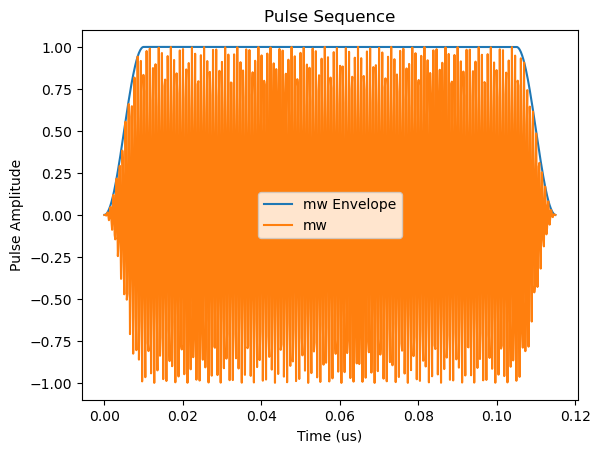

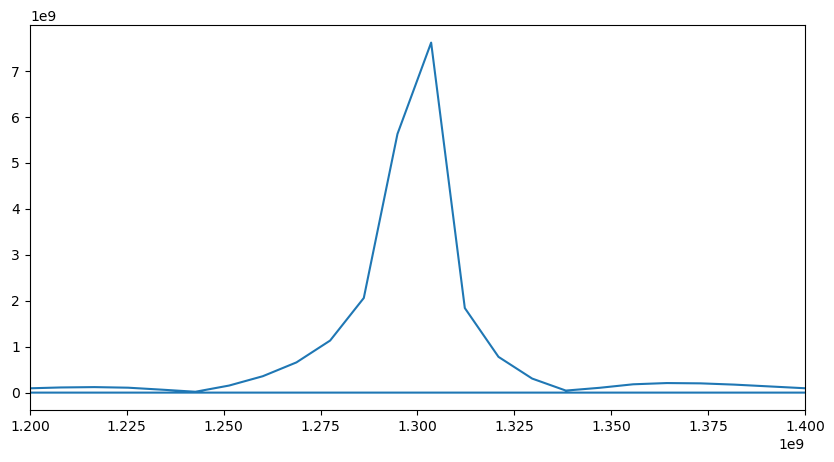

/home/floresh2/.conda/envs/zm/lib/python3.12/site-packages/qutip/utilities.py:55: RuntimeWarning: overflow encountered in exp
  result[non_zero] = 1 / (np.exp(w[non_zero] / w_th) - 1)
/home/floresh2/.conda/envs/zm/lib/python3.12/site-packages/qutip/solver/solver_base.py:576: FutureWarning: e_ops will be keyword only from qutip 5.3 for all solver
  warnings.warn(


Reducing to 2-dimensional Hilbert space


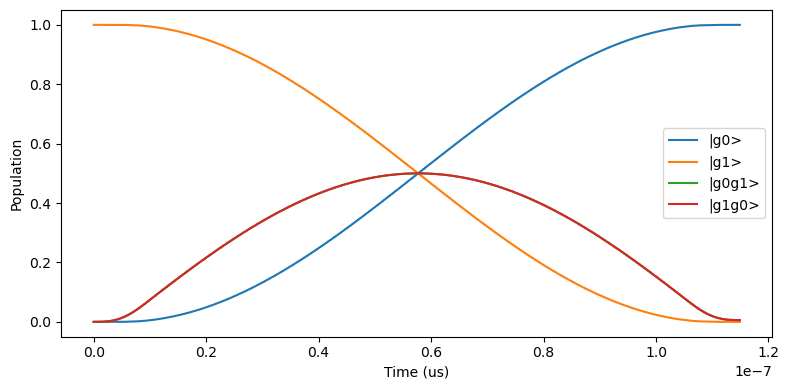

0.9999635351208128


In [51]:
qargs = {
        'optical_fc':           2e9, 
        'optical_df':           0.3e9,
        'mw_fc':                1.3e9, 
        'optical_lifetime':     1/6e-9, 
        'branching_ratio':      0.0005,
        'dark_count_rate':      10e3,
        'coupling_efficiency':  0.002,
        'debye_waller_factor':  0.7,
        'non_radiative_factor': 0.5,
        't2_star' :             1.6e-6,
        
        }
ramsey_sequence = {
    'mw' : {'pulse_train' : ['pi_X']},
    # 'optical' : {'pulse_train' : [pulses['pi/2']['width'], wait_time, pulses['pi/2']['width'], wait_time, 'readout_up']}
}
t = np.arange(0, get_pulse_train_time(ramsey_sequence), 1/6.144e9)
ramsey_sigs = process_pulse_train(t, ramsey_sequence, plot=True)
# Plot the fourier transform of the pulse
plt.figure(figsize=(10, 5))
freqs = np.fft.fftfreq(len(t), t[1]-t[0])
plt.plot(freqs, np.abs(np.fft.fft(ramsey_sigs['mw'])))
plt.xlim(1.2e9, 1.4e9)
plt.show()

q = ce.ColorCenterQubit(**qargs)
result = q.apply_pulse_sequence(t, ramsey_sigs, plot=True)
print(np.abs(result.expect[0][-1]))

  0%|                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

Reducing to 2-dimensional Hilbert space


/home/floresh2/.conda/envs/zm/lib/python3.12/site-packages/qutip/utilities.py:55: RuntimeWarning: overflow encountered in exp
  result[non_zero] = 1 / (np.exp(w[non_zero] / w_th) - 1)
/home/floresh2/.conda/envs/zm/lib/python3.12/site-packages/qutip/solver/solver_base.py:576: FutureWarning: e_ops will be keyword only from qutip 5.3 for all solver
  warnings.warn(


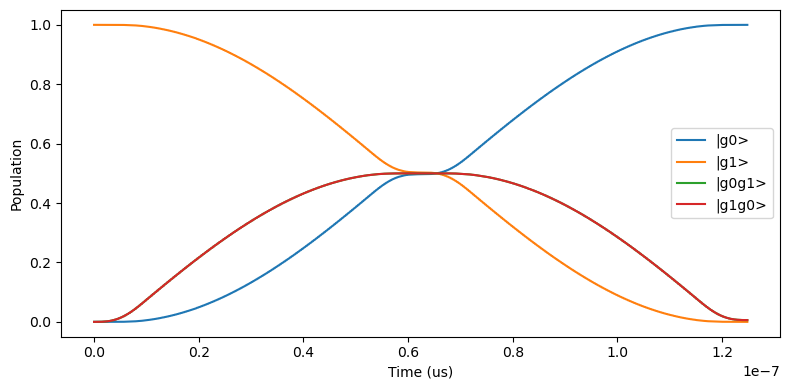

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  9.24it/s]


In [52]:
qargs = {
        'optical_fc':           2e9, 
        'optical_df':           0.3e9,
        'mw_fc':                1.3e9, 
        'optical_lifetime':     1/6e-9, 
        'branching_ratio':      0.0005,
        'dark_count_rate':      10e3,
        'coupling_efficiency':  0.002,
        'debye_waller_factor':  0.7,
        'non_radiative_factor': 0.5,
        # 'gamma_DL':             1e3, # HEOM Bath bandwidth
        # 'lambda_DL':            3e8, # HEOM Bath coupling strength
        # 'bath_temp':            1000.3, # HEOM Bath temperature
        # 'Nk':                   1, # HEOM Bath number of exponentials
        # 'sigmaz_noise_fn':      lambda t: generate_1f_noise(t, f_min=1, f_max=1e6)/1.6e-6
    }

wait_times = np.linspace(0e-6, 5e-6, 1)
transfer = []
for wait_time in tqdm(wait_times):
    ramsey_sequence = {
        'mw' : {'pulse_train' : ['pi/2_X', wait_time, 'pi/2_X']},
        # 'optical' : {'pulse_train' : [pulses['pi/2']['width'], wait_time, pulses['pi/2']['width'], wait_time, 'readout_up']}
    }
    t = np.arange(0, get_pulse_train_time(ramsey_sequence), 1/6.144e9)
    ramsey_sigs = process_pulse_train(t, ramsey_sequence, plot=False)
    
    q = ce.ColorCenterQubit(**qargs)
    result = q.apply_pulse_sequence(t, ramsey_sigs, plot=True, custom_options={'atol':1e-9, 'rtol':1e-9})
#     transfer.append(result.expect[3][-1])

# plt.plot(wait_times, transfer)
# plt.show()

  0%|                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

Reducing to 2-dimensional Hilbert space


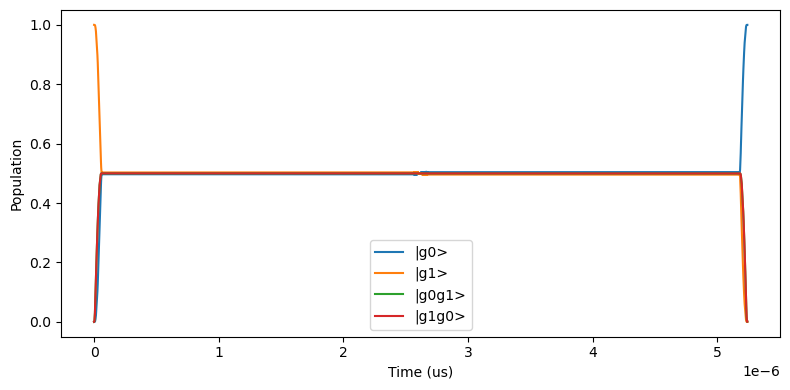

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.41s/it]


In [54]:

wait_times = np.linspace(5e-6, 50e-6, 1)
transfer = []
for wait_time in tqdm(wait_times):
    ramsey_sequence = {
        'mw' : {'pulse_train' : ['pi/2_X', wait_time/2, 'pi_Y', wait_time/2, 'pi/2_X']},
        # 'optical' : {'pulse_train' : [pulses['pi/2']['width'], wait_time, pulses['pi/2']['width'], wait_time, 'readout_up']}
    }
    t = np.arange(0, get_pulse_train_time(ramsey_sequence), 1/6.144e9)
    ramsey_sigs = process_pulse_train(t, ramsey_sequence, plot=False)
    q = ce.ColorCenterQubit(**qargs)
    result = q.apply_pulse_sequence(t, ramsey_sigs, plot=True, custom_options={'atol':1e-9, 'rtol':1e-9})
    

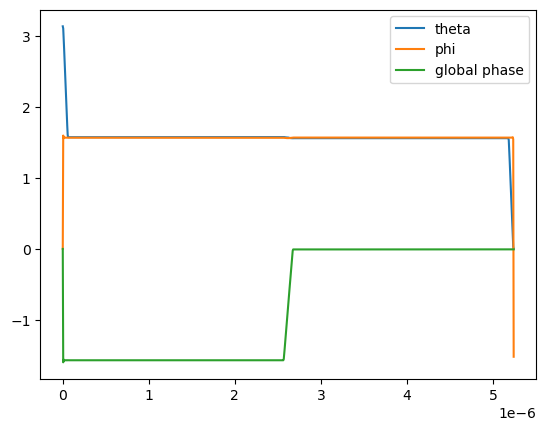

In [55]:
def get_bloch_angles(states, tlist, f_rot=0, plot=False):
    # Check if states have 4 levels
    thetas = []
    phis = []
    global_phases = []
    # Loop over states
    for i, state in enumerate(states):
        # Project full state to qubit subspace
        rho_qubit = state
        if f_rot:
            U = (-1j * 2*np.pi*f_rot * tlist[i] / 2 * qt.sigmaz()).expm()
            rho_qubit = U * rho_qubit

        # Extract Bloch vector
        x = qt.expect(qt.sigmax(), rho_qubit)
        y = qt.expect(qt.sigmay(), rho_qubit)
        z = qt.expect(qt.sigmaz(), rho_qubit)
        thetas.append(np.arccos(z))
        phis.append(np.arctan2(y, x))
        global_phases.append(np.angle(rho_qubit.full()[0,0]))
    if plot:
        plt.figure()
        plt.plot(tlist, thetas, label='theta')
        plt.plot(tlist, phis, label='phi')
        plt.plot(tlist, global_phases, label='global phase')
        plt.legend()
        plt.show()
    return thetas, phis, global_phases

num_frames = 1000
states = result.states[::len(result.states)//num_frames]
times = t[::len(result.states)//num_frames]
f_rot = 1.3e9
thetas, phis, global_phases = get_bloch_angles(states, times, f_rot, plot=True)

In [75]:
import jax
import jax.numpy as jnp

np.float64(0.0)

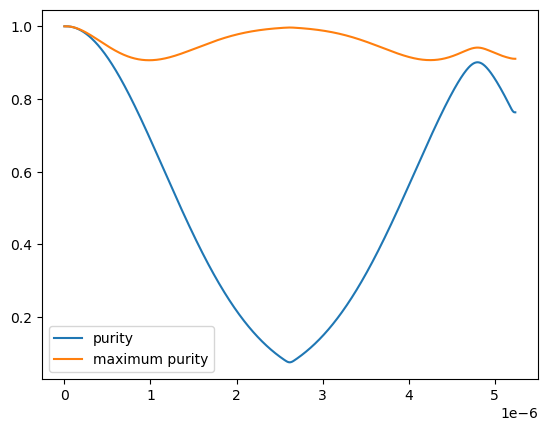

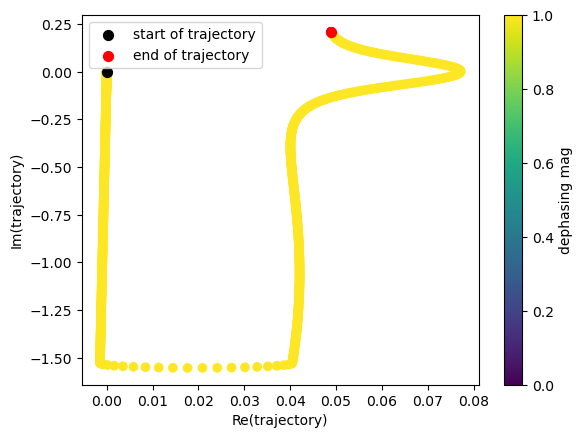

In [103]:

def gaussian_decay(x, tau=1):
    '''Returns a one sided gaussian whose 1/e time is 1'''
    return jnp.exp(-x**2/tau**2)

def exponential_decay(x, tau=1):
    '''Returns an exponential decay whose 1/e time is 1'''
    return jnp.exp(-x/tau)

def analyze_state_purity(tlist, states, dephasing_rate, memory_tau, purity_decay_fn=gaussian_decay, memory_decay_fn=exponential_decay, plot=False, f_rot=0):
    '''Analyzes the coherence of a sequence of states given the rates of dephasing and memory loss'''
    dt = tlist[1] - tlist[0]
    g0 = qt.basis(2, 0)
    g1 = qt.basis(2, 1)
    thetas, phis, global_phases = get_bloch_angles(states, tlist, f_rot)
    
    purity_history = np.zeros(len(tlist))
    trajectory_history = np.zeros(len(tlist), dtype=complex)
    dephasing_mag_history = np.zeros(len(tlist))
    forgotten_trajectory_history = np.zeros(len(tlist))
    total_trajectory_history = np.zeros(len(tlist))

    total_forgotten_trajectory = 0
    dephasing_trajectory = 0 + 0j
    for i, state in enumerate(states):
        bloch_phi=phis[i]
        global_phase=global_phases[i]
        p21 = np.abs(qt.expect(g1*g0.dag(), state))

        dephasing_mag = p21/0.5

        dephasing = dt*dephasing_rate*dephasing_mag*np.exp(1j*(bloch_phi+2*global_phase))
        dephasing_trajectory += dephasing
        total_trajectory = np.abs(dephasing_trajectory) + total_forgotten_trajectory

        if i > 0:
            delta_trajectory = total_trajectory - np.abs(trajectory_history[i-1]) - forgotten_trajectory_history[i-1]
        else:
            delta_trajectory = total_trajectory

        forgotten_function = lambda x: purity_decay_fn(x)*(1-memory_decay_fn(x, memory_tau))
        delta_forgotten = jax.grad(forgotten_function)(total_trajectory)*delta_trajectory


        if delta_forgotten > np.abs(dephasing_trajectory):
            total_forgotten_trajectory += np.abs(dephasing_trajectory)
            dephasing_trajectory = 0 + 0j
        else:
            total_forgotten_trajectory += delta_forgotten
            dephasing_trajectory -= delta_forgotten*np.exp(1j*np.angle(dephasing_trajectory))


        purity_history[i] = purity_decay_fn(total_trajectory)
        trajectory_history[i] = dephasing_trajectory
        dephasing_mag_history[i] = dephasing_mag
        forgotten_trajectory_history[i] = total_forgotten_trajectory
        total_trajectory_history[i] = total_trajectory
    
    if plot:
        plt.figure()
        plt.plot(tlist, purity_history, label='purity')
        plt.plot(tlist, purity_decay_fn(forgotten_trajectory_history), label='maximum purity')
        # plt.plot(tlist, np.abs(trajectory_history), label='dephasing trajectory')
        # plt.plot(tlist, total_trajectory_history, label='total trajectory')
        plt.legend()
        plt.show()

        plt.figure()
        plt.scatter(np.real(trajectory_history), np.imag(trajectory_history), c=dephasing_mag_history, cmap='viridis')
        plt.colorbar(label='dephasing mag')
        plt.xlabel('Re(trajectory)')
        plt.ylabel('Im(trajectory)')
        # Put a red circle at the end of the trajectory
        plt.scatter(0,0, c='k', s=50, label='start of trajectory')
        plt.scatter(np.real(trajectory_history[-1]), np.imag(trajectory_history[-1]), c='r', s=50, label='end of trajectory')
        plt.legend()
        plt.show()
        
    return purity_history, lost_purity_history, trajectory_history, dephasing_mag_history

num_frames = 1000
states = result.states[::len(result.states)//num_frames]
times = t[::len(result.states)//num_frames]
f_rot = 1.3e9
purity_history, lost_purity_history, trajectory_history, dephasing_mag_history = analyze_state_purity(times, states, 1/1.6e-6, 1, plot=True, f_rot=f_rot)


In [24]:

import matplotlib.pyplot as plt
import imageio
import os

def plot_bloch_gif(states, tlist, f_rot, filename="bloch.gif"):
    frames = []
    tmp_dir = "bloch_frames"
    os.makedirs(tmp_dir, exist_ok=True)

    # Projection operators for |g0⟩ and |g1⟩ in 4D space
    P_g0 = qt.basis(4, 0)
    P_g1 = qt.basis(4, 1)

    # Loop over states
    for i, state in enumerate(states):
        # Project full state to qubit subspace
        rho_full = state
        rho_qubit = qt.Qobj(np.array([
            [ (P_g0.dag() * rho_full * P_g0), (P_g0.dag() * rho_full * P_g1)],
            [ (P_g1.dag() * rho_full * P_g0), (P_g1.dag() * rho_full * P_g1)]
        ]))
        if f_rot:
            U = (-1j * 2*np.pi*f_rot * tlist[i] / 2 * qt.sigmaz()).expm()
            rho_qubit = U * rho_qubit * U.dag()

        # Extract Bloch vector
        bloch = qt.Bloch()
        x = np.real((qt.sigmax() * rho_qubit).tr())
        y = np.real((qt.sigmay() * rho_qubit).tr())
        z = np.real((qt.sigmaz() * rho_qubit).tr())
        bloch.add_vectors([x, y, z])
        bloch.render()

        # Save frame
        frame_path = f"{tmp_dir}/frame_{i:04d}.png"
        bloch.fig.savefig(frame_path, dpi=150)
        plt.close(bloch.fig)
        frames.append(imageio.imread(frame_path))

    # Save as GIF
    imageio.mimsave(filename, frames, fps=15)
    # Clean up temporary files
    for f in os.listdir(tmp_dir):
        os.remove(os.path.join(tmp_dir, f))
    os.rmdir(tmp_dir)
    print(f"Saved Bloch sphere animation to {filename}")

num_frames = 100
states = result.states[::len(result.states)//num_frames]
times = t[::len(t)//num_frames]
f_rot = 1.3e9

plot_bloch_gif(states, times, f_rot, '/home/floresh2/file_system/git/JourneyMAPS/tests/bloch.gif')

/tmp/ipykernel_3585167/284189102.py:38: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  frames.append(imageio.imread(frame_path))


Saved Bloch sphere animation to /home/floresh2/file_system/git/JourneyMAPS/tests/bloch.gif


1229 1229


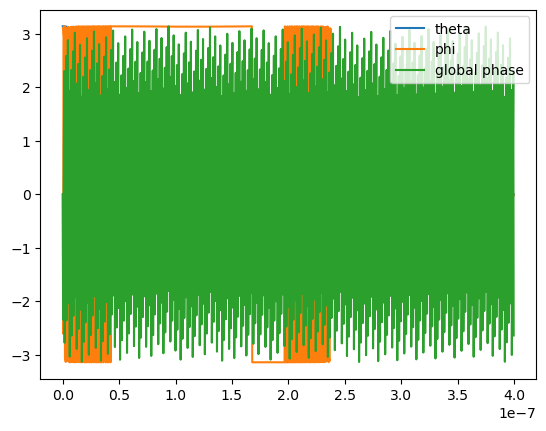

In [21]:
num_frames = 1000
states = result.states[::len(result.states)//num_frames]
times = t[::len(t)//num_frames]
f_rot = 1.3e9
thetas, phis, global_phases = plot_bloch_angles(states, times, f_rot)

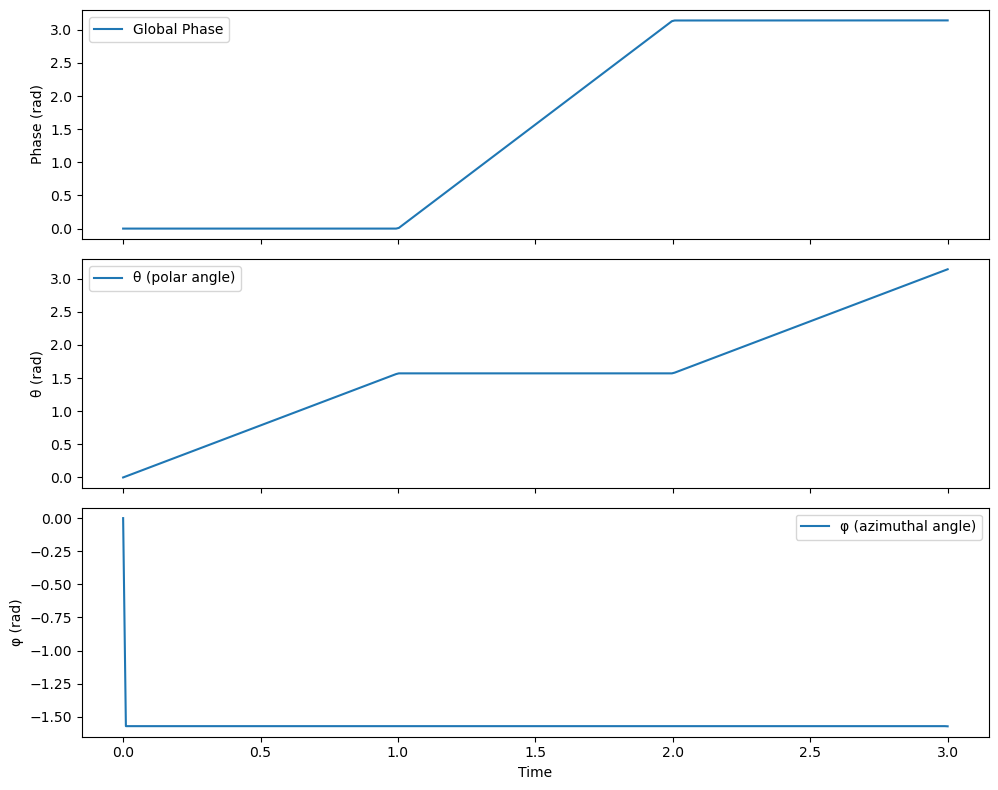

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *

def global_phase(state):
    # Remove global phase by rotating |0⟩ component to be real and positive
    alpha = state.full()[0][0]
    phase = np.angle(alpha)
    return phase

def bloch_angles(state):
    bloch = Bloch()
    x = expect(sigmax(), state)
    y = expect(sigmay(), state)
    z = expect(sigmaz(), state)
    theta = np.arccos(z)                # polar angle
    phi = np.arctan2(y, x)              # azimuthal angle
    return theta, phi

# Basic parameters
T_pulse = 1.0             # Pulse duration
steps = 100               # Time steps per pulse
tlist = np.linspace(0, 3*T_pulse, 3*steps)

# Operators and initial state
sx = sigmax()
sy = sigmay()
sz = sigmaz()
psi0 = basis(2, 0)  # |0⟩ state

# Pulse Hamiltonians
Hx = 0.5 * np.pi / T_pulse * sx    # x π pulse in T_pulse time
Hy = 1 * np.pi / T_pulse * sy    # y π pulse
Hx2 = 0.5 * Hx                     # x π/2 pulse

# Piecewise pulse schedule: X/2, Y, X/2
def H_t(t, args):
    if t < T_pulse:
        return Hx2
    elif t < 2*T_pulse:
        return Hy
    else:
        return Hx2

# Time-dependent Hamiltonian
H = [H_t]

# Run simulation
result = mesolve(H, psi0, tlist, [], [])

# Track global phase and Bloch angles
phases = []
thetas = []
phis = []

for state in result.states:
    # Remove norm for safety (could accumulate small numerical error)
    state = state.unit()
    phase = global_phase(state)
    theta, phi = bloch_angles(state)
    phases.append(phase)
    thetas.append(theta)
    phis.append(phi)

# Plot results
fig, ax = plt.subplots(3, 1, figsize=(10, 8), sharex=True)
ax[0].plot(tlist, np.unwrap(phases), label='Global Phase')
ax[0].set_ylabel("Phase (rad)")
ax[0].legend()

ax[1].plot(tlist, thetas, label='θ (polar angle)')
ax[1].set_ylabel("θ (rad)")
ax[1].legend()

ax[2].plot(tlist, phis, label='φ (azimuthal angle)')
ax[2].set_ylabel("φ (rad)")
ax[2].set_xlabel("Time")
ax[2].legend()

plt.tight_layout()
plt.show()

num_frames = 100
states = result.states[::len(result.states)//num_frames]
times = t[::len(t)//num_frames]
f_rot = 1.3e9
# thetas, phis, global_phases = plot_bloch_angles(result.states, tlist, 0)